In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("../result.dat", sep="\s+", usecols=lambda column: column in ['R3', 'R7', 'R3_raw', 'R5_raw', 'R6_raw', 'R7_raw', 'Class'])

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy DecisionTree: ", accuracy_score(y_test, y_pred))


Accuracy DecisionTree:  0.997309842810423


In [4]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  background       1.00      1.00      1.00     10164
      banana       1.00      1.00      1.00     11685
        wine       1.00      1.00      1.00     16067

    accuracy                           1.00     37916
   macro avg       1.00      1.00      1.00     37916
weighted avg       1.00      1.00      1.00     37916



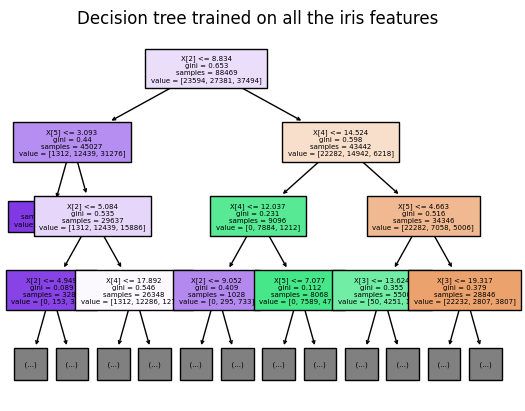

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure()
plot_tree(clf, filled=True, max_depth=3, fontsize=5)
plt.title("Decision tree trained on all the iris features")
plt.show()

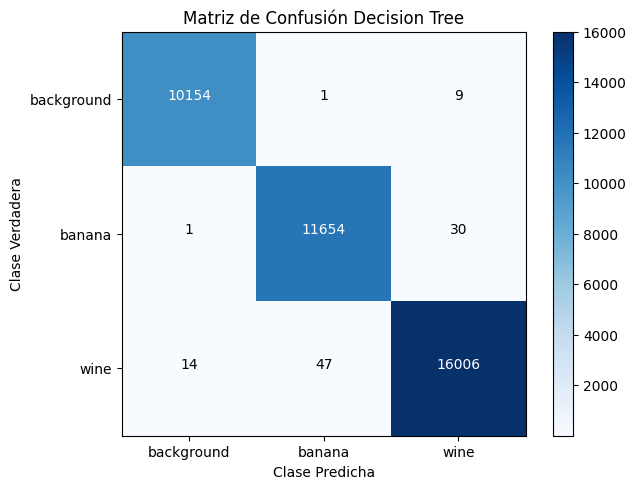

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Crear la matriz de confusión
cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)


# Visualizar la matriz de confusión
plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión Decision Tree')
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_pred))
for i in range(3):
    for j in range(3):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > cnf_matrix.max() / 2. else "black")
plt.tight_layout()
plt.ylabel('Clase Verdadera')
plt.xlabel('Clase Predicha')
plt.show()
